# Notebook for training our optional network
For the preprocessing and the network, the same hyperparameters as for the mandatory network were used. The preprocessing evaluation was repeated for the optional data.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils import sample_data, load_data
from src.constants import Paths, features, coords_features, class_names_opt
from src.postprocessor import Postprocessor
from src.preprocessor import Preprocessor
from src.performance_calculator import calculate_scores

from framework.network import NeuralNetwork
from framework.layers import FullyConnectedLayer
from framework.activation_layers import Sigmoid, Softmax, ReLU
from framework.optimizer import SGD
from framework.losses import CrossEntropy
from framework.input_layer import DefaultInputLayer
from framework.utils import one_hot_vector_to_classes

np.random.seed(42)

In [2]:
# Initialize processors
class_thresholds = {
    "swipe_left": 0.3,
    "swipe_right": 0.3,
    "rotate": 0.5,
    "rotate_left": 0.6,
    "flip_table": 0.4,
    "pinch": 0.8,
    "point": 0.4,
    "spread": 0.5,
    "swipe_down": 0.6,
    "swipe_up": 0.7,
}
preproc = Preprocessor(to_delta=features, to_drop=coords_features)
postproc = Postprocessor(window_size=10, classes=class_names_opt, thresholds=class_thresholds, idle_thresh=0.8)

In [3]:
# Load the training data and preprocess it
x_train, y_train = load_data(paths=[Paths.DATA_MAND_TRAIN_DATA, Paths.DATA_OPT_TRAIN_DATA], preprocessor=preproc, class_names=class_names_opt)
# Load the validation data and preprocess it
x_val, y_val = load_data(paths=[Paths.DATA_MAND_VAL_DATA, Paths.DATA_OPT_VAL_DATA], preprocessor=preproc, class_names=class_names_opt)
gt = one_hot_vector_to_classes(y_val, class_names_opt, sparse=False)

In [4]:
# Sample idle because of class imbalance
x_train, y_train = sample_data(x_train, y_train)

In [5]:
# Define Model Architecture
layers = [
    FullyConnectedLayer(x_train.shape[1], 64),
    ReLU(),
    FullyConnectedLayer(64, 64),
    Sigmoid(),
    FullyConnectedLayer(64, 32),
    Sigmoid(),
    FullyConnectedLayer(32, len(class_names_opt)),
    Softmax(),
]
nn = NeuralNetwork(DefaultInputLayer(), layers)

In [6]:
results = []
# Train the Model
for i in range(100):
    SGD.update(
        nn=nn,
        loss=CrossEntropy(),
        lr=0.01,
        epochs=1,
        data=(x_train, y_train),
    )
    # Test the trained model on so far unseen data
    predictions = nn(x_val)
    events = postproc.postprocess(predictions, batch=True)
    results.append(calculate_scores(events, gt, verbose=False))

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

In [7]:
best_epoch = np.argmax(results) + 1
print(np.max(results))

104.34389140271497


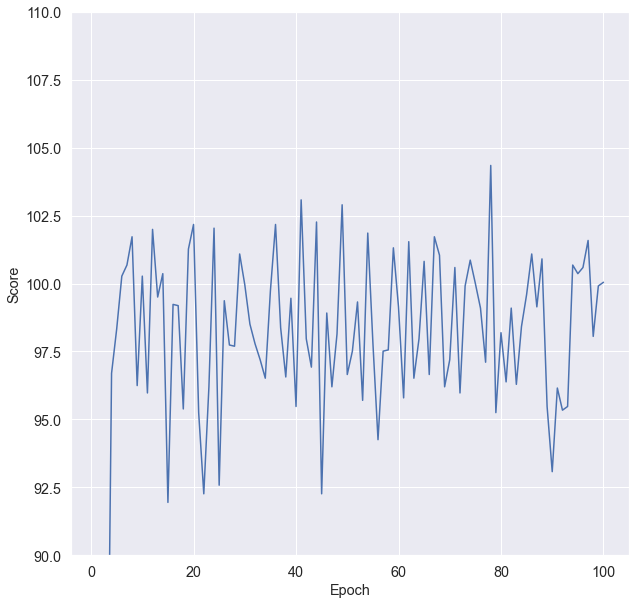

In [8]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.lineplot(x=list(range(1, 101)), y=results)
plt.ylim(90, 110)
plt.xticks(fontsize="large")
plt.yticks(fontsize="large")
plt.xlabel("Epoch", fontsize="large")
plt.ylabel("Score", fontsize="large")
plt.show()

In [9]:
max_score, best_model, best_seed = 0, None, 42
# Random Seeds
for i in [42, 22, 1999, 73, 7, 41, 2022, 1, 0]:
    np.random.seed(i)
    layers = [
        FullyConnectedLayer(x_train.shape[1], 64),
        ReLU(),
        FullyConnectedLayer(64, 64),
        Sigmoid(),
        FullyConnectedLayer(64, 32),
        Sigmoid(),
        FullyConnectedLayer(32, len(class_names_opt)),
        Softmax(),
    ]
    curr_nn = NeuralNetwork(DefaultInputLayer(), layers)
    SGD.update(
        nn=curr_nn,
        loss=CrossEntropy(),
        lr=0.01,
        epochs=best_epoch,
        data=(x_train, y_train),
    )
    # Test the trained model on so far unseen data
    predictions = curr_nn(x_val)
    events = postproc.postprocess(predictions, batch=True)
    curr_score = calculate_scores(events, gt, verbose=False)
    print(f"Score with seed {i}: {curr_score}")
    if curr_score > max_score:
        max_score = curr_score
        best_model = curr_nn
        best_seed = i
max_score

training:   0%|          | 0/78 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

Score with seed 42: 96.10859728506797


training:   0%|          | 0/78 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

Score with seed 22: 97.28506787330326


training:   0%|          | 0/78 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

Score with seed 1999: 96.69683257918561


training:   0%|          | 0/78 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

Score with seed 73: 100.22624434389148


training:   0%|          | 0/78 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

Score with seed 7: 102.17194570135753


training:   0%|          | 0/78 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

Score with seed 41: 101.99095022624438


training:   0%|          | 0/78 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

Score with seed 2022: 93.3936651583712


training:   0%|          | 0/78 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

Score with seed 1: 97.73755656108607


training:   0%|          | 0/78 [00:00<?, ?it/s]

Prediction:   0%|          | 0/43307 [00:00<?, ?it/s]

Score with seed 0: 92.71493212669701


102.17194570135753

In [12]:
# As last step, train on the validation dataset to get even better results for the test dataset
SGD.update(
    nn=best_model,
    loss=CrossEntropy(),
    lr=0.01,
    epochs=10,
    data=(x_val, y_val),
)

training:   0%|          | 0/10 [00:00<?, ?it/s]

(0.9293433083956775, 0.20603500945851724)

In [13]:
best_model.save(Paths.MODELS / "network_opt.pkl")
preproc.save_pca(Paths.MODELS / "pca_opt.pkl")